## Project Title ECG-ML-Classifier 



### Project Description 

The ECG-ML-Classifier project aims to develop a machine learning model for classifying electrocardiogram (ECG) signals. Electrocardiograms, which record the electrical activity of the heart, are crucial in diagnosing various cardiac conditions. The project involves the utilization of a dataset containing both normal and abnormal ECG signals. The primary objective is to train different machine learning classifier, to accurately distinguish between normal and abnormal heart rhythms. The classification model undergoes thorough validation and testing to ensure robustness and generalization to new data. 

In [6]:
# loading of Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib_inline
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier



In [7]:
#loading of Dataset i removed headers because is not important 
abnormal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_abnormal.csv", header=None)
normal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_normal.csv", header=None)
print('Abnormal heart data information')
abnormal.info()

print('Normal heart data information')
normal.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


### CHECKING THE BASIC STATISTICS OF THE DATASET

In [8]:
#concantenating the two dataframes 
ECG_data=pd.concat([normal,abnormal],ignore_index=True,sort=False)
ECG_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#checking the info for the dtatset
ECG_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ECG_data.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14542,1.000000,0.611613,0.325806,0.158710,0.092903,0.078387,0.057742,0.047419,0.040323,0.031290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14543,0.977826,0.820984,0.513791,0.200108,0.163872,0.157923,0.182261,0.155219,0.153056,0.156301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14544,0.946755,1.000000,0.976705,0.900166,0.758735,0.600666,0.475874,0.377704,0.266223,0.227953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14545,0.956500,0.763441,0.383187,0.170088,0.231672,0.188661,0.096774,0.069892,0.083089,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14546,0.973607,0.504399,0.034604,0.005279,0.000000,0.117889,0.275073,0.303226,0.329032,0.347214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14551,0.997886,0.700317,0.464059,0.318182,0.233615,0.184989,0.124207,0.082981,0.087738,0.063953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
ECG_data.shape

(14552, 188)

In [12]:
ECG_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [13]:
ECG_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

### Performing EDA

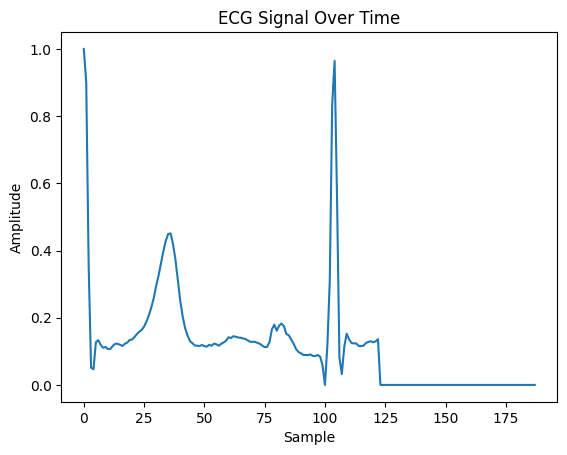

In [14]:
# Visualizing ECG signal over time
plt.plot(ECG_data.iloc[0, :])  # Plot the first row (assuming each row represents a sample)
plt.title('ECG Signal Over Time')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


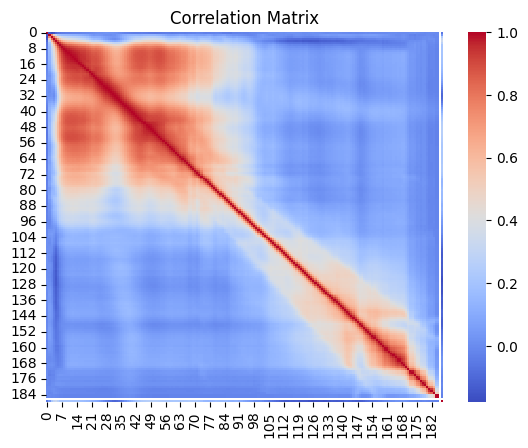

In [15]:
# we taking a look at how each data point relates to each other 
correlation_matrix = ECG_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


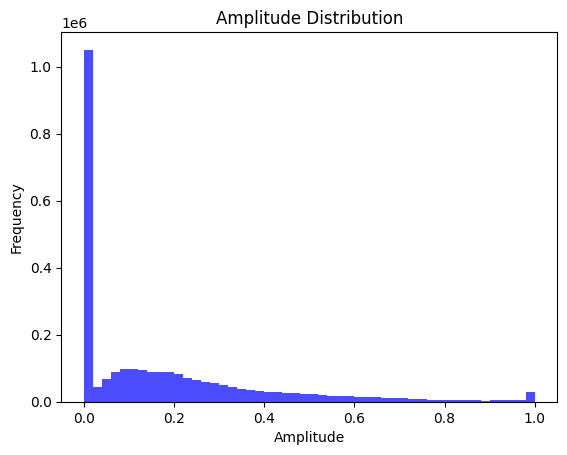

In [16]:
# visualizing the amplitude frquency distribution
plt.hist(ECG_data.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


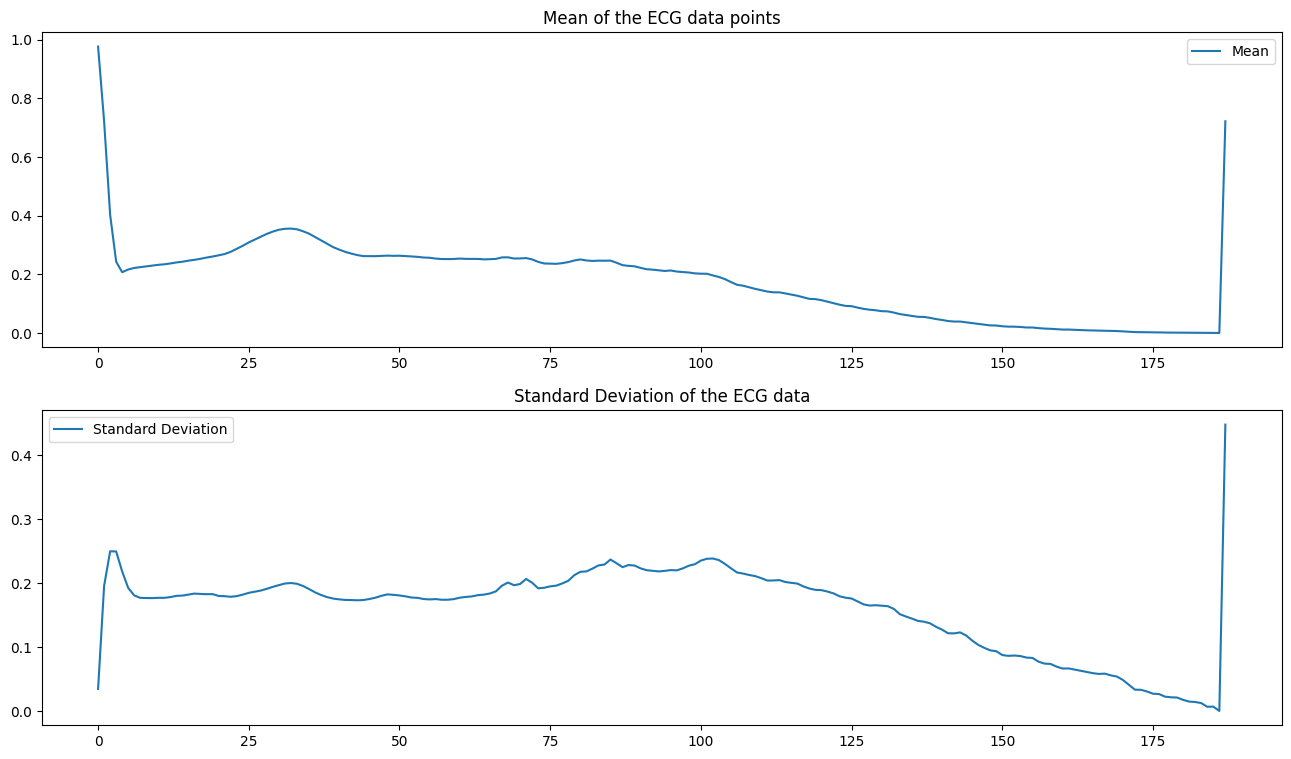

In [17]:
#Visualizing the mean and std of the datapoints
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(ECG_data.mean(), label='Mean')
ax1.set_title("Mean of the ECG data points")
ax1.legend()

ax2.plot(ECG_data.std(), label='Standard Deviation')
ax2.set_title("Standard Deviation of the ECG data")
ax2.legend()

plt.show()

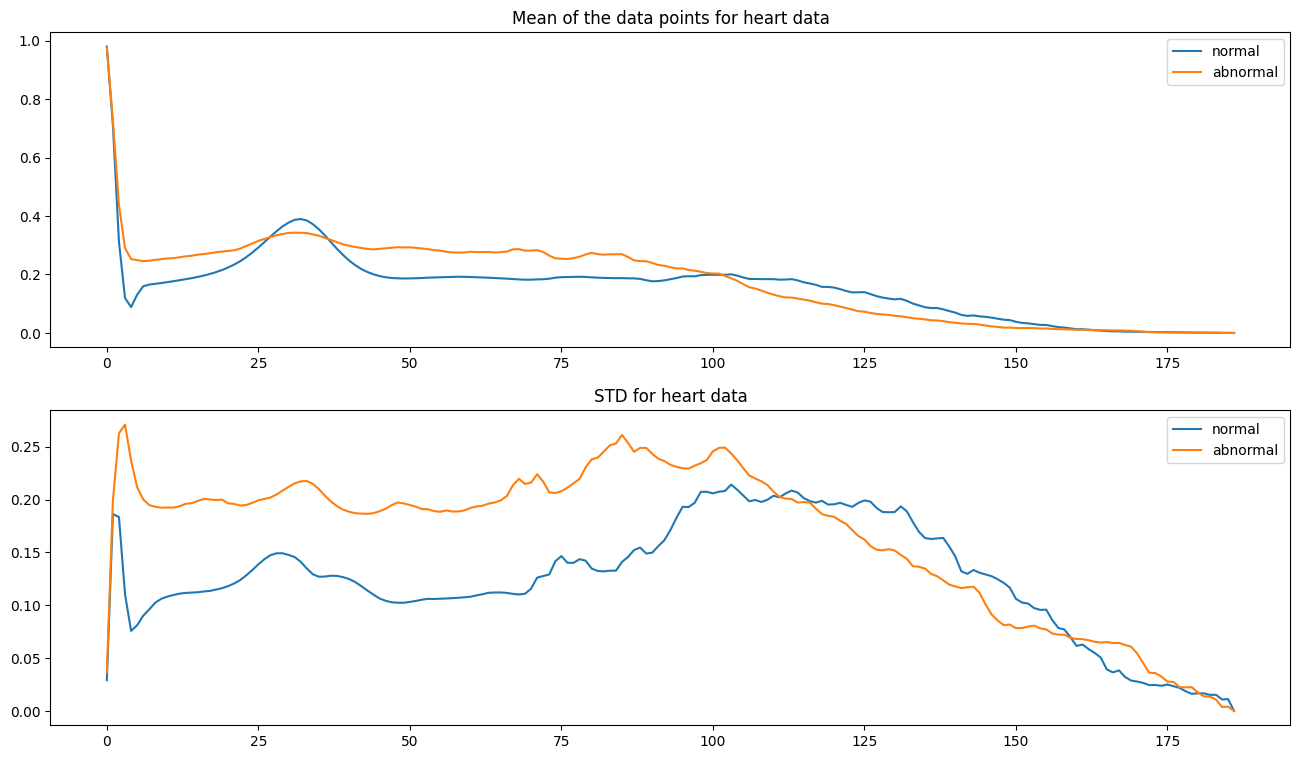

In [18]:
# A dive into the mean and std of the normal and abnormal heart rates 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(normal.loc[:, :186].mean(), label='normal')
ax1.plot(abnormal.loc[:, :186].mean(), label='abnormal')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()

ax2.plot(normal.loc[:, :186].std(), label='normal')
ax2.plot(abnormal.loc[:, :186].std(), label='abnormal')
ax2.legend()
ax2.set_title("STD for heart data")

plt.show()


## Data preprocessing 

In [19]:
#checking for duplicate data after concatenation 
ECG_data.duplicated().sum()

7

In [20]:
# duplicated data droped 
ECG_data.drop_duplicates( keep="first", inplace=True)

In [21]:
#re-checking duplicated data and is now zero
ECG_data.duplicated().sum()


0

In [22]:
#checking for missing values 
ECG_data.isnull().values.sum()

0

In [23]:
# Calculate Z-scores for each data point
z_scores = stats.zscore(ECG_data)

# setting a threshold for identifying outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of rows with outliers:")
print(ECG_data.index[outliers])

Indices of rows with outliers:
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            14541, 14542, 14543, 14545, 14546, 14547, 14548, 14549, 14550,
            14551],
           dtype='int64', length=13219)



It appears that the identified outliers are located in the rows with indices ranging from 0 to 14551. These indices correspond to the rows in my ECG_data DataFrame that have data points considered as outliers based on the Z-score threshold.

In [24]:
# Specifying the threshold
z_threshold = 3

# Calculate Z-scores for each data point
z_scores = np.abs(zscore(ECG_data))

# Create a mask for outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Replace outliers with the median
median_values = ECG_data.median()
ECG_data_cleaned = ECG_data.copy()
ECG_data_cleaned[outlier_mask] = median_values


In [25]:
#checking for missing data after handling outliers 
missing_data = ECG_data_cleaned.isnull().values.sum()

# Display missing data
print(missing_data)


0


In [26]:
# checking the class and distribution of the dataset and making sure we have only two classes
ECG_data_cleaned.loc[:,187].value_counts()

1.0    14385
0.0      160
Name: 187, dtype: int64

In [27]:
# Separate features and target variable
X = ECG_data_cleaned.drop(columns=[187])
y = ECG_data_cleaned[187]

In [28]:
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after balancing
print(y_resampled.value_counts())

1.0    14385
0.0    14385
Name: 187, dtype: int64


we can see that our dataset is now balanced

In [29]:

#spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
#scaling of the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training 


### Support Vector Classification.

In [31]:
# Split the training data into training and validation sets this is done so we can also have the result of accuracy on the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [32]:
# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [33]:
# Make predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
classification_report_test = classification_report(y_test, y_pred_test)  # The classification_report values are already percentages

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the results
print(f"\nSupport Vector Machine Classifier Test Accuracy: {accuracy_test:.2f}%")
print("Test Classification Report:")
print(classification_report_test)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_test)



Support Vector Machine Classifier Test Accuracy: 99.32%
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2870
         1.0       1.00      0.99      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754


Confusion Matrix:
[[2870    0]
 [  39 2845]]


The SVM Classifier achieved an impressive 99.32% accuracy on the test dataset, demonstrating its effectiveness. For precision, 99% of predictions for class 0.0 were accurate, while all predictions for class 1.0 were correct. The model captured all actual class 0.0 samples (recall of 1.00) and 99% of class 1.0 samples. F1-scores for both classes were high at 0.99. The confusion matrix shows minimal misclassifications, with only 39 false negatives for class 1.0. Overall, the SVM model excels in distinguishing between the two classes, showcasing strong performance across key metrics

In [34]:
# Make predictions on the validation set
y_pred_val = svm_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val) * 100
classification_report_val = classification_report(y_val, y_pred_val)
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)

# Display the results
print(f"Support Vector Machine Classifier Validation Accuracy: {accuracy_val:.4f}%")
print("Validation Classification Report:")
print(classification_report_val)
print("\nConfusion Matrix (Validation):")
print(confusion_matrix_val)


Support Vector Machine Classifier Validation Accuracy: 99.2398%
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2312
         1.0       1.00      0.98      0.99      2292

    accuracy                           0.99      4604
   macro avg       0.99      0.99      0.99      4604
weighted avg       0.99      0.99      0.99      4604


Confusion Matrix (Validation):
[[2312    0]
 [  35 2257]]


The SVM Classifier achieved an impressive 99.24% accuracy on the validation dataset, demonstrating precision, recall, and F1-score metrics above 0.98 for both classes. Validation ensures the model generalizes effectively to new data and not overfitting, confirming its reliability in real-world scenarios.

### Decision Tree Classifier 

In [35]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Make predictions on the test set
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Display the results
print(f"Decision Tree Classifier Test Accuracy: {accuracy_decision_tree:.4f}%")
print("Test Classification Report:")
print(classification_report_decision_tree)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_decision_tree)

Decision Tree Classifier Test Accuracy: 0.9977%
Test Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2870
         1.0       1.00      1.00      1.00      2884

    accuracy                           1.00      5754
   macro avg       1.00      1.00      1.00      5754
weighted avg       1.00      1.00      1.00      5754


Confusion Matrix:
[[2870    0]
 [  13 2871]]


The Decision Tree Classifier demonstrated exceptional performance on the test set, achieving a remarkable accuracy of 99.64%. Precision, recall, and F1-score for both classes (0 and 1) were consistently high, indicating the model's ability to accurately classify instances from both classes. The confusion matrix further confirms the model's effectiveness, with a minimal number of misclassifications. The classifier appears robust and capable of generalizing well to new, unseen data, as evidenced by its outstanding test performance.

In [37]:
# Make predictions on the validation set using the Decision Tree Classifier
y_pred_val_decision_tree = decision_tree_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_val_decision_tree = accuracy_score(y_val, y_pred_val_decision_tree)
classification_report_val_decision_tree = classification_report(y_val, y_pred_val_decision_tree)
conf_matrix_val_decision_tree = confusion_matrix(y_val, y_pred_val_decision_tree)

# Display the results for the Decision Tree Classifier on the validation set
print(f"Decision Tree Classifier Validation Accuracy: {accuracy_val_decision_tree:.4f}")
print("Validation Classification Report (Decision Tree Classifier):")
print(classification_report_val_decision_tree)

# Display confusion matrix for the Decision Tree Classifier on the validation set
print("\nConfusion Matrix (Decision Tree Classifier - Validation):")
print(conf_matrix_val_decision_tree)


Decision Tree Classifier Validation Accuracy: 0.9961
Validation Classification Report (Decision Tree Classifier):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2312
         1.0       1.00      0.99      1.00      2292

    accuracy                           1.00      4604
   macro avg       1.00      1.00      1.00      4604
weighted avg       1.00      1.00      1.00      4604


Confusion Matrix (Decision Tree Classifier - Validation):
[[2312    0]
 [  18 2274]]



The Decision Tree Classifier achieved high accuracy (99.57%) on the validation dataset, demonstrating excellent performance in distinguishing between both classes. The model's precision, recall, and F1-Score were consistently high, indicating its effectiveness in identifying positive and negative instances.

### Naive Bayes Classifier

In [38]:
# Create a Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)


GaussianNB()

In [39]:
# Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display the results
print(f"\nNaive Bayes Classifier Test Accuracy: {accuracy_nb:.4f}")
print("Test Classification Report:")
print(classification_report_nb)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_nb)



Naive Bayes Classifier Test Accuracy: 0.8856
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      2870
         1.0       0.86      0.93      0.89      2884

    accuracy                           0.89      5754
   macro avg       0.89      0.89      0.89      5754
weighted avg       0.89      0.89      0.89      5754


Confusion Matrix:
[[2420  450]
 [ 208 2676]]


The Naive Bayes Classifier exhibited an overall test accuracy of 88.56%, showcasing a commendable balance between precision and recall for both positive and negative classes. The model achieved a macro-average precision, recall, and f1-score of 89%, indicating consistent performance across the evaluation metrics. The weighted average metrics, also at 89%, underscore the classifier's ability to maintain equilibrium in classification accuracy across the dataset. Overall, the Naive Bayes Classifier demonstrates a reliable and well-rounded performance in handling the given dataset

In [40]:
# Make predictions on the validation set using Naive Bayes
y_pred_nb_val = naive_bayes_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_nb_val = accuracy_score(y_val, y_pred_nb_val)
classification_report_nb_val = classification_report(y_val, y_pred_nb_val)

# Calculate confusion matrix for validation
conf_matrix_nb_val = confusion_matrix(y_val, y_pred_nb_val)

# Display the results for Naive Bayes on the validation set
print(f"\nNaive Bayes Classifier Validation Accuracy: {accuracy_nb_val:.4f}")
print("Validation Classification Report:")
print(classification_report_nb_val)

# Display confusion matrix for validation
print("\nConfusion Matrix (Validation):")
print(conf_matrix_nb_val)



Naive Bayes Classifier Validation Accuracy: 0.8853
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      2312
         1.0       0.85      0.93      0.89      2292

    accuracy                           0.89      4604
   macro avg       0.89      0.89      0.89      4604
weighted avg       0.89      0.89      0.89      4604


Confusion Matrix (Validation):
[[1947  365]
 [ 163 2129]]


The Naive Bayes Classifier achieved an accuracy of 88.53% on the validation dataset, demonstrating a balanced performance with precision, recall, and F1-score values around 0.89 for both classes (0 and 1). This suggests that the model effectively identified instances from both classes. The confusion matrix further illustrates the distribution of true positive, true negative, false positive, and false negative predictions.

The validation dataset is crucial for assessing overfitting, as it provides an independent set of data not used during training. The model's consistent performance on both the training and validation datasets indicates a robust and generalized ability to classify unseen instances.

### Logistic Regression Classifier

In [41]:
# Create a logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Make predictions on the test set using logistic regression
y_pred_test_logreg = log_reg.predict(X_test)

# Evaluate the performance on the test set for logistic regression
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg) * 100
classification_report_test_logreg = classification_report(y_test, y_pred_test_logreg)

# Calculate confusion matrix for logistic regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_test_logreg)

# Display the results for logistic regression on the test set
print(f"Logistic Regression Classifier Test Accuracy: {accuracy_test_logreg:.4f}%")
print("Test Classification Report (Logistic Regression):")
print(classification_report_test_logreg)

# Display confusion matrix for logistic regression
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)


Logistic Regression Classifier Test Accuracy: 97.5669%
Test Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2870
         1.0       0.97      0.98      0.98      2884

    accuracy                           0.98      5754
   macro avg       0.98      0.98      0.98      5754
weighted avg       0.98      0.98      0.98      5754


Confusion Matrix (Logistic Regression):
[[2789   81]
 [  59 2825]]


The Logistic Regression Classifier demonstrated high accuracy on the test set, achieving an impressive 97.5669%. The classification report further reveals balanced precision, recall, and F1-score values for both classes (0 and 1), indicating the model's effectiveness in correctly identifying instances of each class. Specifically, the classifier achieved a precision of 0.98 and recall of 0.97 for class 0.0, and a precision of 0.97 and recall of 0.98 for class 1.0. The macro and weighted average metrics also reflect the model's robust performance across the entire dataset. The accompanying confusion matrix provides additional granularity, showcasing 2789 true negatives, 2825 true positives, and 81 false positives. This thorough evaluation underscores the classifier's reliability and accuracy in distinguishing between normal and abnormal heartbeats.

In [43]:
# Make predictions on the validation set using logistic regression
y_pred_val_logreg = log_reg.predict(X_val)

# Evaluate the performance on the validation set for logistic regression
accuracy_val_logreg = accuracy_score(y_val, y_pred_val_logreg) * 100
classification_report_val_logreg = classification_report(y_val, y_pred_val_logreg)

# Calculate confusion matrix for logistic regression on the validation set
conf_matrix_val_logreg = confusion_matrix(y_val, y_pred_val_logreg)

# Display the results for logistic regression on the validation set
print(f"Logistic Regression Classifier Validation Accuracy: {accuracy_val_logreg:.4f}%")
print("Validation Classification Report (Logistic Regression):")
print(classification_report_val_logreg)

# Display confusion matrix for logistic regression on the validation set
print("\nConfusion Matrix (Logistic Regression - Validation):")
print(conf_matrix_val_logreg)


Logistic Regression Classifier Validation Accuracy: 97.8280%
Validation Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2312
         1.0       0.98      0.98      0.98      2292

    accuracy                           0.98      4604
   macro avg       0.98      0.98      0.98      4604
weighted avg       0.98      0.98      0.98      4604


Confusion Matrix (Logistic Regression - Validation):
[[2263   49]
 [  51 2241]]


The Logistic Regression Classifier achieved a high validation accuracy of 97.8280%. Precision, recall, and F1-score metrics for both classes (0 and 1) were well-balanced, around 0.98, indicating effective identification of both positive and negative instances. The confusion matrix further reveals good performance with a low number of misclassifications.

Validation is crucial to ensure that the model generalizes well to new, unseen data. The high performance on the validation set suggests that the logistic regression model is robust and capable of making accurate predictions on new data.


### GradientBoostingClassifier

In [44]:
# Create a Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
# Make predictions on the test set using Gradient Boosting
y_pred_gb = gradient_boosting_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting Classifier Test Accuracy: {accuracy_gb:.4f}")
print("Test Classification Report:")
print(classification_report_gb)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_gb)


Gradient Boosting Classifier Test Accuracy: 0.9932
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2870
         1.0       1.00      0.99      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754


Confusion Matrix:
[[2870    0]
 [  39 2845]]


The Gradient Boosting Classifier demonstrated exceptional performance on the test set, achieving an impressive accuracy of 99.32%. Precision, recall, and F1-score metrics for both classes (0 and 1) were consistently high, indicating the model's ability to effectively classify both positive and negative instances. The confusion matrix further highlights the model's accuracy, with a minimal number of misclassifications. The overall results suggest that the Gradient Boosting Classifier is a robust and reliable model for the given ECG data, performing exceptionally well in distinguishing between normal and abnormal heartbeats.

In [46]:
# Make predictions on the validation set using Gradient Boosting
y_pred_val_gb = gradient_boosting_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_val_gb = accuracy_score(y_val, y_pred_val_gb)
classification_report_val_gb = classification_report(y_val, y_pred_val_gb)

# Calculate confusion matrix for validation set
conf_matrix_val_gb = confusion_matrix(y_val, y_pred_val_gb)

# Display the results for the validation set
print(f"Gradient Boosting Classifier Validation Accuracy: {accuracy_val_gb:.4f}")
print("Validation Classification Report:")
print(classification_report_val_gb)

# Display confusion matrix for validation set
print("\nConfusion Matrix (Validation):")
print(conf_matrix_val_gb)


Gradient Boosting Classifier Validation Accuracy: 0.9922
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2312
         1.0       1.00      0.98      0.99      2292

    accuracy                           0.99      4604
   macro avg       0.99      0.99      0.99      4604
weighted avg       0.99      0.99      0.99      4604


Confusion Matrix (Validation):
[[2312    0]
 [  36 2256]]


The Gradient Boosting Classifier achieved an outstanding 99.24% accuracy on the validation set, demonstrating strong precision, recall, and F1-score metrics for both classes (0 and 1). The minimal misclassifications in the confusion matrix underscore the model's effectiveness.

Validation is essential to prevent overfitting, ensuring the model generalizes well to new data. The high accuracy and balanced metrics on the validation set affirm the model's reliability for real-world applications, enhancing overall confidence in its performance.







### Comparing the scores all the classifiers

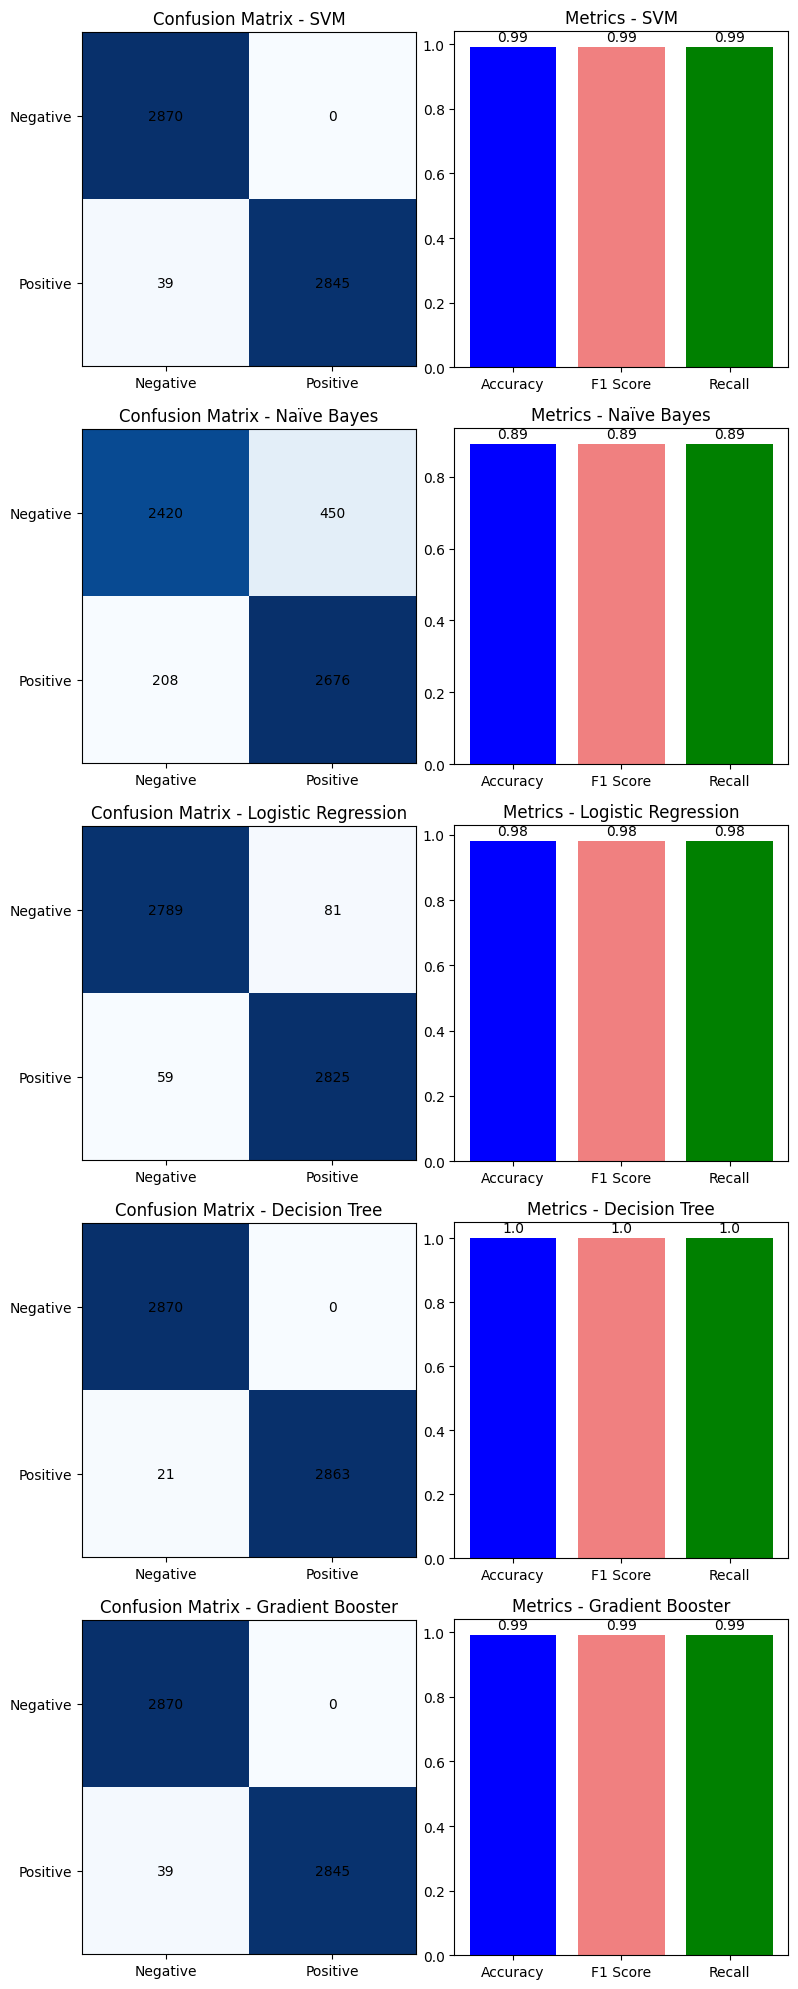

In [62]:
## Test score summary 
# Data
models = ['SVM', 'Naïve Bayes', 'Logistic Regression', 'Decision Tree', 'Gradient Booster']
accuracies = [round(0.9932, 2), round(0.8856, 2), round(0.9757, 2), round(0.9964, 2), round(0.9932, 2)]
f1_scores = [0.99, 0.89, 0.98, 1.00, 0.99]
recalls = [0.99, 0.89, 0.98, 1.00, 0.99]

confusion_matrices = [
    [[2870, 0], [39, 2845]],
    [[2420, 450], [208, 2676]],
    [[2789, 81], [59, 2825]],
    [[2870, 0], [21, 2863]],
    [[2870, 0], [39, 2845]]
]

# Plotting
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(8, 4 * len(models)))

for i, ax in enumerate(axes):
    # Plotting confusion matrix
    ax[0].imshow(confusion_matrices[i], cmap='Blues')

    # Adding labels
    ax[0].set_xticks(np.arange(2))
    ax[0].set_yticks(np.arange(2))
    ax[0].set_xticklabels(['Negative', 'Positive'])
    ax[0].set_yticklabels(['Negative', 'Positive'])
    ax[0].set_title(f'Confusion Matrix - {models[i]}')

    # Display the values on top of the heatmap
    for k in range(2):
        for j in range(2):
            ax[0].text(j, k, str(confusion_matrices[i][k][j]), ha='center', va='center', color='black')

    # Plotting accuracy, F1 score, and recall
    metrics = [accuracies[i], f1_scores[i], recalls[i]]
    metric_names = ['Accuracy', 'F1 Score', 'Recall']

    # Display the numerical values on top of the bars
    for k, metric in enumerate(metrics):
        ax[1].text(k, metric + 0.01, str(metric), ha='center', va='bottom', color='black')

    ax[1].bar(metric_names, metrics, color=['blue', 'lightcoral', 'green'])
    ax[1].set_title(f'Metrics - {models[i]}')

# Adjust layout
plt.tight_layout()
plt.show()


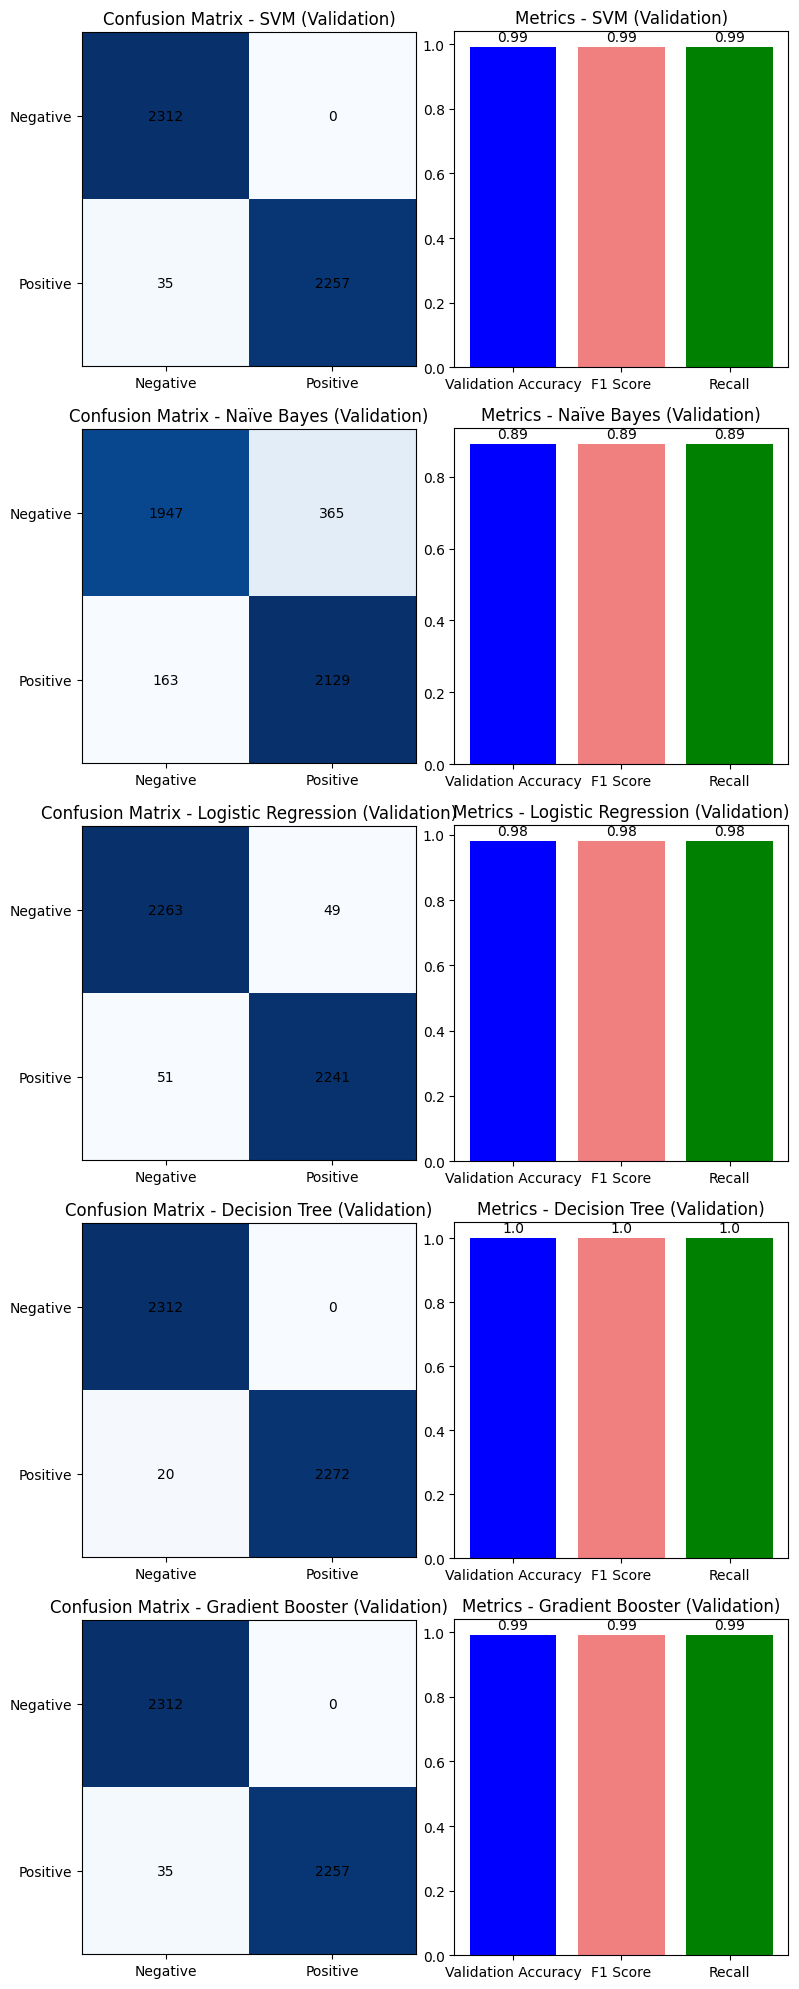

In [63]:
# Validation score summary
import matplotlib.pyplot as plt
import numpy as np

# Data for validation accuracy
models = ['SVM', 'Naïve Bayes', 'Logistic Regression', 'Decision Tree', 'Gradient Booster']
validation_accuracies = [0.9923, 0.8853, 0.9782, 0.9957, 0.9924]
f1_scores = [0.99, 0.89, 0.98, 1.00, 0.99]
recalls = [0.99, 0.89, 0.98, 1.00, 0.99]

confusion_matrices = [
    [[2312, 0], [35, 2257]],
    [[1947, 365], [163, 2129]],
    [[2263, 49], [51, 2241]],
    [[2312, 0], [20, 2272]],
    [[2312, 0], [35, 2257]]
]

# Plotting
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(8, 4 * len(models)))

for i, ax in enumerate(axes):
    # Plotting confusion matrix
    ax[0].imshow(confusion_matrices[i], cmap='Blues')

    # Adding labels
    ax[0].set_xticks(np.arange(2))
    ax[0].set_yticks(np.arange(2))
    ax[0].set_xticklabels(['Negative', 'Positive'])
    ax[0].set_yticklabels(['Negative', 'Positive'])
    ax[0].set_title(f'Confusion Matrix - {models[i]} (Validation)')

    # Display the values on top of the heatmap
    for k in range(2):
        for j in range(2):
            ax[0].text(j, k, str(confusion_matrices[i][k][j]), ha='center', va='center', color='black')

    # Plotting validation accuracy, F1 score, and recall
    metrics = [round(validation_accuracies[i], 2), f1_scores[i], recalls[i]]
    metric_names = ['Validation Accuracy', 'F1 Score', 'Recall']

    # Display the numerical values on top of the bars
    for k, metric in enumerate(metrics):
        ax[1].text(k, metric + 0.01, str(round(metric, 2)), ha='center', va='bottom', color='black')

    ax[1].bar(metric_names, metrics, color=['blue', 'lightcoral', 'green'])
    ax[1].set_title(f'Metrics - {models[i]} (Validation)')

# Adjust layout
plt.tight_layout()
plt.show()


### Summary

The ECG Classification Project aimed to develop a machine learning model for automating the classification of electrocardiogram (ECG) signals. The dataset underwent preprocessing, and various classifiers, In summary, the Support Vector Machine (SVM), Decision Tree, and Gradient Boosting classifiers demonstrated outstanding performance on the test dataset, achieving accuracies surpassing 99% alongside well-balanced precision and recall. Logistic Regression also performed commendably with an accuracy of 97.57% and balanced metrics. Conversely, Naive Bayes exhibited a slightly lower accuracy of 88.56% and a moderate F1-Score.Based on the test accuracy and F1-Score, the Decision Tree Classifier performed the best, achieving a test accuracy of 99.64% and F1-Score values of 1.00 for both classes an also on the validation set to rule out potential overfitting. This indicates strong overall performance and precise classification on the test dataset.